#Задание 1

#Информация об исполнителе

In [1]:
print('Исполнитель:')
print('ФИО: Гуменюк Яна Евгеньевна')
print('Группа: 20БИ-3')
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Исполнитель:
ФИО: Гуменюк Яна Евгеньевна
Группа: 20БИ-3
Wed Mar  3 16:48:31 MSK 2021


#Связь и обмен данными с Google-диском и другие манипуляции, обеспечивающие связь с необходимыми ресурсами на удаленном сервере

In [20]:
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/Task1'))
%ll -lF /content/drive/MyDrive/"Colab Notebooks"/"Task1"
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'adc.json', 'drive', 'sample_data']
['MyDrive', '.file-revisions-by-id', '.shortcut-targets-by-id', '.Trash']
['SWOT-анализ.ipynb', 'SWOTable.gsheet']
total 5
-rw------- 1 root  151 Mar  3 18:57 SWOTable.gsheet
-rw------- 1 root 4341 Mar  3 12:04 SWOT-анализ.ipynb


# Таблица

In [21]:
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
table = gs.open_by_key('1EmUdIEw8O1xec-5P77ZLF5BY9-Kw34Guyg38vyQSRRE')
print(table.worksheets())
print (dir(table))


[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1441603>, <Worksheet 'Opportunities' id:1224256298>, <Worksheet 'Threats' id:1929994358>, <Worksheet 'Results' id:1024069695>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_properties', '_spreadsheets_get', '_spreadsheets_sheets_copy_to', 'add_worksheet', 'batch_update', 'client', 'del_worksheet', 'duplicate_sheet', 'fetch_sheet_metadata', 'get_worksheet', 'id', 'list_permissions', 'remove_permissions', 'reorder_worksheets', 'share', 'sheet1', 'title', 'updated', 'url', 'values_append', 'values_batch_get', 'values_batch_update', 'values_clear', 'values_get', 'values_update', 'worksheet', 'worksheets']


#Strengths

In [22]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Strengths')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Strengths",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
power_strengths = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    power_strengths.append(int(row[2])*float(row[3]))
  i+=1
cell_list = worksheet.range('E2:E5')
cell_values = power_strengths
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1441603>, <Worksheet 'Opportunities' id:1224256298>, <Worksheet 'Threats' id:1929994358>, <Worksheet 'Results' id:1024069695>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_list_cells', '_properties', 'acell', 'add_cols', 'add_protected_range', 'add_rows', 'append_row', 'append_rows', 'batch_get', 'batch_update', 'cell', 'clear', 'clear_basic_filter', 'clear_note', 'client', 'col_count', 'col_values', 'copy_to', 'delete_columns', 'delete_dimension', 'delete_row', 'delete_rows', 'duplicate', 'export', 'find', 'findall', 'format', 'freeze', 'frozen_col_count', 'frozen_row_count', 'get', 'get_all_records', 'get_all_values', '

{'spreadsheetId': '1EmUdIEw8O1xec-5P77ZLF5BY9-Kw34Guyg38vyQSRRE',
 'updatedCells': 4,
 'updatedColumns': 1,
 'updatedRange': 'Strengths!E2:E5',
 'updatedRows': 4}

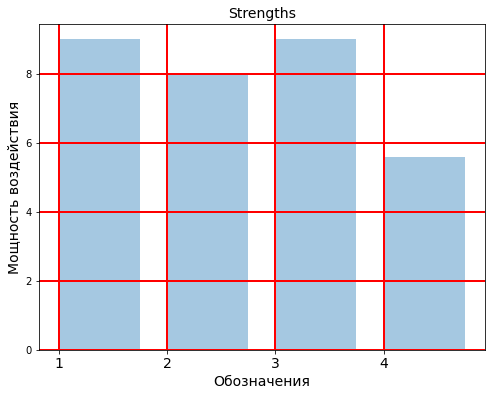

In [23]:
import matplotlib
import matplotlib.pyplot as plt

x_float = [1,2,3,4]
y = power_strengths
y_float = power_strengths                                                                                                                                 

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('Strengths', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()

#Weaknesses

In [24]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Weaknesses')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Weaknesses",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
power_weaknesses = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    power_weaknesses.append(int(row[2])*float(row[3]))
  i+=1
cell_list = worksheet.range('E2:E5')
cell_values = power_weaknesses
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1441603>, <Worksheet 'Opportunities' id:1224256298>, <Worksheet 'Threats' id:1929994358>, <Worksheet 'Results' id:1024069695>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_list_cells', '_properties', 'acell', 'add_cols', 'add_protected_range', 'add_rows', 'append_row', 'append_rows', 'batch_get', 'batch_update', 'cell', 'clear', 'clear_basic_filter', 'clear_note', 'client', 'col_count', 'col_values', 'copy_to', 'delete_columns', 'delete_dimension', 'delete_row', 'delete_rows', 'duplicate', 'export', 'find', 'findall', 'format', 'freeze', 'frozen_col_count', 'frozen_row_count', 'get', 'get_all_records', 'get_all_values', '

{'spreadsheetId': '1EmUdIEw8O1xec-5P77ZLF5BY9-Kw34Guyg38vyQSRRE',
 'updatedCells': 4,
 'updatedColumns': 1,
 'updatedRange': 'Weaknesses!E2:E5',
 'updatedRows': 4}

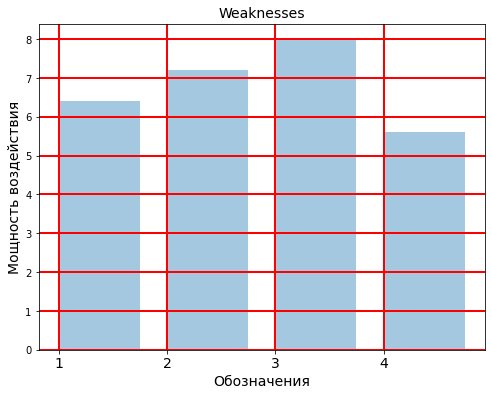

In [25]:
import matplotlib
import matplotlib.pyplot as plt

x_float = [1,2,3,4]
y = power_weaknesses
y_float = power_weaknesses                                                                                                                                 

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('Weaknesses', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()

#Opportunities

In [26]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Opportunities')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Opportunities",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
power_opportunities = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    power_opportunities.append(int(row[2])*float(row[3]))
  i+=1
cell_list = worksheet.range('E2:E5')
cell_values = power_opportunities
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1441603>, <Worksheet 'Opportunities' id:1224256298>, <Worksheet 'Threats' id:1929994358>, <Worksheet 'Results' id:1024069695>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_list_cells', '_properties', 'acell', 'add_cols', 'add_protected_range', 'add_rows', 'append_row', 'append_rows', 'batch_get', 'batch_update', 'cell', 'clear', 'clear_basic_filter', 'clear_note', 'client', 'col_count', 'col_values', 'copy_to', 'delete_columns', 'delete_dimension', 'delete_row', 'delete_rows', 'duplicate', 'export', 'find', 'findall', 'format', 'freeze', 'frozen_col_count', 'frozen_row_count', 'get', 'get_all_records', 'get_all_values', '

{'spreadsheetId': '1EmUdIEw8O1xec-5P77ZLF5BY9-Kw34Guyg38vyQSRRE',
 'updatedCells': 4,
 'updatedColumns': 1,
 'updatedRange': 'Opportunities!E2:E5',
 'updatedRows': 4}

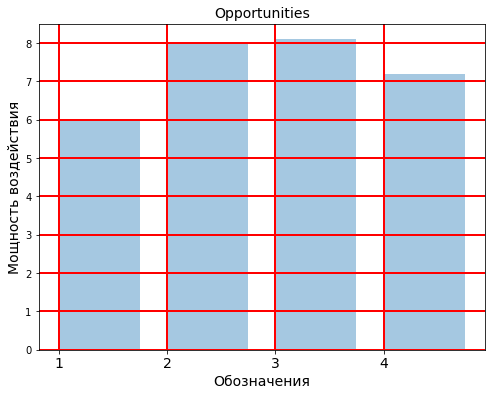

In [27]:
import matplotlib
import matplotlib.pyplot as plt

x_float = [1,2,3,4]
y = power_opportunities
y_float = power_opportunities                                                                                                                               

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('Opportunities', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()

#Threats

In [28]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Threats')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Threats",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
power_threats = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    power_threats.append(int(row[2])*float(row[3]))
  i+=1
cell_list = worksheet.range('E2:E5')
cell_values = power_threats
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1441603>, <Worksheet 'Opportunities' id:1224256298>, <Worksheet 'Threats' id:1929994358>, <Worksheet 'Results' id:1024069695>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_list_cells', '_properties', 'acell', 'add_cols', 'add_protected_range', 'add_rows', 'append_row', 'append_rows', 'batch_get', 'batch_update', 'cell', 'clear', 'clear_basic_filter', 'clear_note', 'client', 'col_count', 'col_values', 'copy_to', 'delete_columns', 'delete_dimension', 'delete_row', 'delete_rows', 'duplicate', 'export', 'find', 'findall', 'format', 'freeze', 'frozen_col_count', 'frozen_row_count', 'get', 'get_all_records', 'get_all_values', '

{'spreadsheetId': '1EmUdIEw8O1xec-5P77ZLF5BY9-Kw34Guyg38vyQSRRE',
 'updatedCells': 4,
 'updatedColumns': 1,
 'updatedRange': 'Threats!E2:E5',
 'updatedRows': 4}

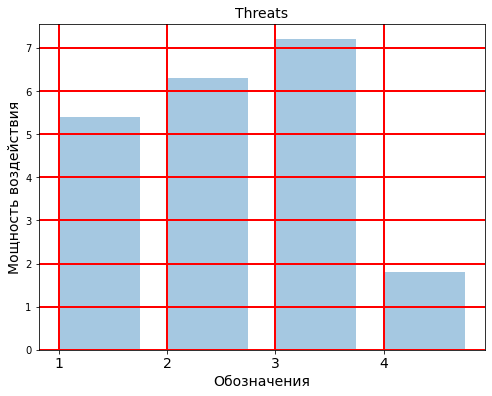

In [29]:
import matplotlib
import matplotlib.pyplot as plt

x_float = [1,2,3,4]
y = power_threats
y_float = power_threats                                                                                                                                

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('Threats', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()

# Итоговая таблица SWOT-анализа

In [30]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Results')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Results",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
value = list()
power = [sum(power_strengths),sum(power_weaknesses),sum(power_opportunities),sum(power_threats)]
print (power)
i=0
for row in rows:
  if(i>=0):
    print (i, row)
  i+=1
cell_list = worksheet.range('B1:B5')
cell_values = power
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)
results = sum(power_strengths)-sum(power_weaknesses)+sum(power_opportunities)-sum(power_threats)
worksheet.update_cell(5,2,results)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1441603>, <Worksheet 'Opportunities' id:1224256298>, <Worksheet 'Threats' id:1929994358>, <Worksheet 'Results' id:1024069695>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_list_cells', '_properties', 'acell', 'add_cols', 'add_protected_range', 'add_rows', 'append_row', 'append_rows', 'batch_get', 'batch_update', 'cell', 'clear', 'clear_basic_filter', 'clear_note', 'client', 'col_count', 'col_values', 'copy_to', 'delete_columns', 'delete_dimension', 'delete_row', 'delete_rows', 'duplicate', 'export', 'find', 'findall', 'format', 'freeze', 'frozen_col_count', 'frozen_row_count', 'get', 'get_all_records', 'get_all_values', '

{'spreadsheetId': '1EmUdIEw8O1xec-5P77ZLF5BY9-Kw34Guyg38vyQSRRE',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Results!B5',
 'updatedRows': 1}

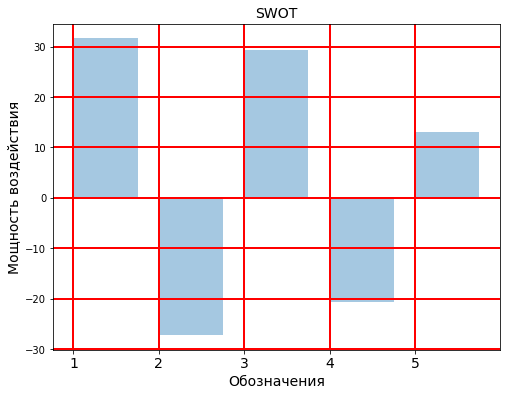

In [31]:
import matplotlib
import matplotlib.pyplot as plt

title = [ "strengths", "weaknesses", "opportunities", "threats", "result"]
x=title
x_float = [1, 2, 3, 4, 5]
y = power
y_float = [sum(power_strengths),-sum(power_weaknesses),sum(power_opportunities),-sum(power_threats),results]                                                                                                                              

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()